Inspired by [a blog post by Steven Morse](https://stmorse.github.io/journal/rw-manifold.html).

In [5]:
from typing import Tuple

import numpy as np
import pandas as pd


def create_random_walks(
    n_dims: int, n_walks: int, walk_length: int, random_seed: int | None = None
) -> Tuple[np.ndarray, pd.DataFrame]:
    """
    Generate random walks in n-dimensional space.

    Args:
        n_dims: Number of dimensions for the random walk
        n_walks: Number of separate walks to generate
        walk_length: Length of each walk (number of steps)
        random_seed: Optional random seed for reproducibility

    Returns:
        Tuple containing:
        - np.ndarray of shape (n_walks * walk_length, n_dims) containing all walks
        - pd.DataFrame with the same data plus walk_id and step columns
    """
    if random_seed is not None:
        np.random.seed(random_seed)

    # Generate all walks
    walks = []
    for _ in range(n_walks):
        steps = np.random.multivariate_normal(
            mean=np.zeros(n_dims), cov=np.eye(n_dims), size=walk_length
        )
        walk = np.cumsum(steps, axis=0)
        walks.append(walk)

    # Stack all walks into a single array
    walks_array = np.vstack(walks)

    # Create DataFrame with walk_id and step columns
    df = pd.DataFrame(
        {
            "walk_id": pd.Categorical(np.repeat(range(n_walks), walk_length)),
            "step": np.tile(np.arange(walk_length), n_walks),
        }
    )

    return walks_array, df

In the blog post, only one or two walks are shown in up to 100 dimensions, with a walk length of 50.
I'm going to go for something more MNIST-like: 10 long walks of 7000 steps each, in 768 dimensions.

In [6]:
random_walks_data, random_walks_labels = create_random_walks(
    n_dims=768, walk_length=7000, n_walks=10, random_seed=42
)

In [7]:
random_walks_data.shape

(70000, 768)

In [8]:
random_walks_labels

walk_id  step
0           0     0
1           0     1
2           0     2
3           0     3
4           0     4
...       ...   ...
69995       9  6995
69996       9  6996
69997       9  6997
69998       9  6998
69999       9  6999

[70000 rows x 2 columns]

In [9]:
from drnb.io.pipeline import create_default_pipeline

data_result = create_default_pipeline(check_for_duplicates=True).run(
    "randomwalks",
    data=random_walks_data,
    target=random_walks_labels,
    tags=["synthetic"],
    url="https://stmorse.github.io/journal/rw-manifold.html",
    verbose=True,
)

[14:30:51] INFO     Requesting one extra neighbor to account for self-neighbor       ]8;id=86996;file:///home/james/dev/drnb3/src/drnb/neighbors/__init__.py\__init__.py]8;;\:]8;id=948023;file:///home/james/dev/drnb3/src/drnb/neighbors/__init__.py#690\690]8;;\

           INFO     Initial data shape: (70000, 768)                                  ]8;id=610966;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=433929;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py#83\83]8;;\

           INFO     Keeping all columns                                             ]8;id=230875;file:///home/james/dev/drnb3/src/drnb/preprocess.py\preprocess.py]8;;\:]8;id=835133;file:///home/james/dev/drnb3/src/drnb/preprocess.py#90\90]8;;\

           INFO     Data shape after filtering columns: (70000, 768)                 ]8;id=288719;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=992944;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py#164\164]8;;\

           INFO     Removing rows with NAs                                           ]8;id=310331;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=324723;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py#145\145]8;;\

           INFO     Data shape after filtering NAs: (70000, 768)                     ]8;id=380824;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=498108;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py#156\156]8;;\

[14:30:54] INFO     Checked for duplicates: found 0                                  ]8;id=245387;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=492880;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py#172\172]8;;\

           INFO     Converting to numpy with {'dtype': 'float32', 'layout': 'c'}     ]8;id=10562;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=217500;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py#187\187]8;;\

           INFO     Writing data for randomwalks                                     ]8;id=437466;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=505319;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py#298\298]8;;\

[14:31:50] INFO     Processing target with initial shape (70000, 2)                  ]8;id=675157;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=799249;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py#243\243]8;;\

           INFO     Keeping all columns                                             ]8;id=496803;file:///home/james/dev/drnb3/src/drnb/preprocess.py\preprocess.py]8;;\:]8;id=892537;file:///home/james/dev/drnb3/src/drnb/preprocess.py#90\90]8;;\

           INFO     Writing target for randomwalks                                   ]8;id=972904;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=508795;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py#298\298]8;;\

           INFO     Calculating nearest neighbors                                    ]8;id=32862;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=600522;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py#317\317]8;;\

           INFO     Loading faiss with AVX2 support.                                   ]8;id=504618;file:///home/james/dev/drnb3/.venv/lib/python3.12/site-packages/faiss-1.9.0-py3.12.egg/faiss/loader.py\loader.py]8;;\:]8;id=426391;file:///home/james/dev/drnb3/.venv/lib/python3.12/site-packages/faiss-1.9.0-py3.12.egg/faiss/loader.py#110\110]8;;\

[14:31:51] INFO     Successfully loaded faiss with AVX2 support.                       ]8;id=171142;file:///home/james/dev/drnb3/.venv/lib/python3.12/site-packages/faiss-1.9.0-py3.12.egg/faiss/loader.py\loader.py]8;;\:]8;id=174566;file:///home/james/dev/drnb3/.venv/lib/python3.12/site-packages/faiss-1.9.0-py3.12.egg/faiss/loader.py#112\112]8;;\

           INFO     Using 'faiss' to find nearest neighbors                           ]8;id=787619;file:///home/james/dev/drnb3/src/drnb/neighbors/__init__.py\__init__.py]8;;\:]8;id=584099;file:///home/james/dev/drnb3/src/drnb/neighbors/__init__.py#90\90]8;;\

           INFO     Finding 151 neighbors using faiss with euclidean metric and      ]8;id=556210;file:///home/james/dev/drnb3/src/drnb/neighbors/__init__.py\__init__.py]8;;\:]8;id=784130;file:///home/james/dev/drnb3/src/drnb/neighbors/__init__.py#103\103]8;;\
                    params: {}                                                                      

[14:31:54] INFO     Writing numpy format to                                          ]8;id=849292;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=104970;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#433\433]8;;\
                    nn/randomwalks.16.euclidean.exact.faiss.idx.npy                                 

[14:31:57] INFO     Writing csv format to                                            ]8;id=327080;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=88430;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#405\405]8;;\
                    nn/randomwalks.16.euclidean.exact.faiss.idx.csv                                 

[14:31:58] INFO     Writing numpy format to                                          ]8;id=727202;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=823783;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#433\433]8;;\
                    nn/randomwalks.16.euclidean.exact.faiss.dist.npy                                

[14:32:00] INFO     Writing csv format to                                            ]8;id=890475;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=581955;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#405\405]8;;\
                    nn/randomwalks.16.euclidean.exact.faiss.dist.csv                                

[14:32:01] INFO     Writing numpy format to                                          ]8;id=67877;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=679795;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#433\433]8;;\
                    nn/randomwalks.51.euclidean.exact.faiss.idx.npy                                 

[14:32:10] INFO     Writing csv format to                                            ]8;id=129254;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=364747;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#405\405]8;;\
                    nn/randomwalks.51.euclidean.exact.faiss.idx.csv                                 

[14:32:14] INFO     Writing numpy format to                                          ]8;id=45239;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=162670;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#433\433]8;;\
                    nn/randomwalks.51.euclidean.exact.faiss.dist.npy                                

[14:32:19] INFO     Writing csv format to                                            ]8;id=40330;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=134848;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#405\405]8;;\
                    nn/randomwalks.51.euclidean.exact.faiss.dist.csv                                

[14:32:24] INFO     Writing numpy format to                                          ]8;id=60540;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=699134;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#433\433]8;;\
                    nn/randomwalks.151.euclidean.exact.faiss.idx.npy                                

           INFO     Writing csv format to                                            ]8;id=98625;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=690367;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#405\405]8;;\
                    nn/randomwalks.151.euclidean.exact.faiss.idx.csv                                

[14:32:34] INFO     Writing numpy format to                                          ]8;id=587373;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=340299;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#433\433]8;;\
                    nn/randomwalks.151.euclidean.exact.faiss.dist.npy                               

[14:32:35] INFO     Writing csv format to                                            ]8;id=695035;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=990420;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#405\405]8;;\
                    nn/randomwalks.151.euclidean.exact.faiss.dist.csv                               

[14:32:48] INFO     Calculating triplets                                             ]8;id=704439;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=90437;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py#331\331]8;;\

[14:32:49] INFO     Writing csv format to triplets/randomwalks.5.1337.idx.csv        ]8;id=626761;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=812580;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#405\405]8;;\

[14:32:51] INFO     Writing csv format to triplets/randomwalks.5.1337.euclidean.csv  ]8;id=252424;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=579498;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#405\405]8;;\

[14:32:53] INFO     Writing numpy format to triplets/randomwalks.5.1337.idx.npy      ]8;id=139818;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=625475;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#433\433]8;;\

           INFO     Writing numpy format to                                          ]8;id=231200;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=613221;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#433\433]8;;\
                    triplets/randomwalks.5.1337.euclidean.npy                                       

           INFO     Writing pipeline result for randomwalks                          ]8;id=489529;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=519545;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py#134\134]8;;\

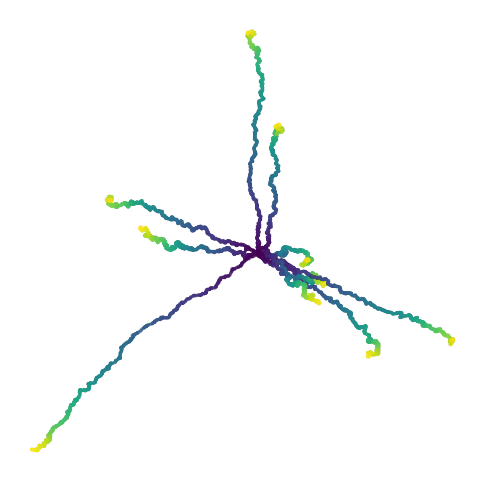

[EvalResult(eval_type='RTE', label='rte-5-euclidean', value=np.float64(0.7325514285714286), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='RPC', label='rpc-5-euclidean', value=np.float32(0.6219935), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='NNP', label='nnp-15-noself-euclidean', value=np.float64(0.4766114285714285), info={'metric': 'euclidean', 'n_neighbors': 15}),
 EvalResult(eval_type='NNP', label='nnp-50-noself-euclidean', value=np.float64(0.5809751428571429), info={'metric': 'euclidean', 'n_neighbors': 50}),
 EvalResult(eval_type='NNP', label='nnp-150-noself-euclidean', value=np.float64(0.6621050476190476), info={'metric': 'euclidean', 'n_neighbors': 150})]

In [11]:
import drnb.embed.pipeline as pl

pl.standard_eval(
    method="pca",
    dataset="randomwalks",
    extra_plot={"figsize": (6, 6)},
)

The colors show the position of the point within each walk, rather than using lines to connect the
points like in Steven Morse's blog post. PCA seems to actually do a good job here.

Let's see what UMAP makes of it.

/home/james/dev/drnb3/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


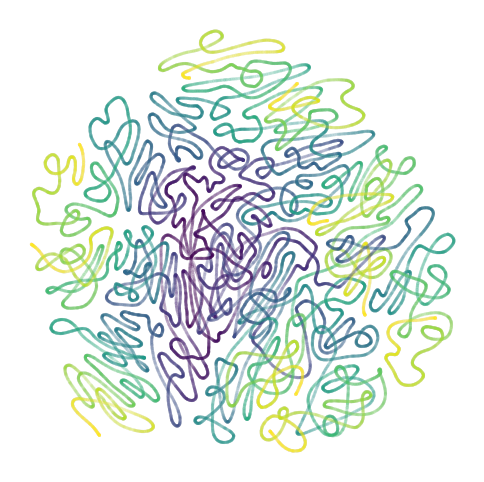

[EvalResult(eval_type='RTE', label='rte-5-euclidean', value=np.float64(0.6844514285714286), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='RPC', label='rpc-5-euclidean', value=np.float32(0.5807115), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='NNP', label='nnp-15-noself-euclidean', value=np.float64(0.8572914285714287), info={'metric': 'euclidean', 'n_neighbors': 15}),
 EvalResult(eval_type='NNP', label='nnp-50-noself-euclidean', value=np.float64(0.7509671428571428), info={'metric': 'euclidean', 'n_neighbors': 50}),
 EvalResult(eval_type='NNP', label='nnp-150-noself-euclidean', value=np.float64(0.5614797142857144), info={'metric': 'euclidean', 'n_neighbors': 150})]

In [14]:
pl.standard_eval(
    method="umap",
    params={"init": "pca"},
    dataset="randomwalks",
    extra_plot={"figsize": (6, 6)},
)

Fascinating (to me): this looks a lot like the `tomoradar` embedding, and shares with it the
property that it's really hard to carry out the spectral initialization (which is why I
chose to use PCA for the initialization). It's not a good visualization compared to PCA, it's just
too local to pick out any details. Let's try increasing the number of neighbors progressively and
see if that helps -- it does for `tomoradar`.

/home/james/dev/drnb3/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


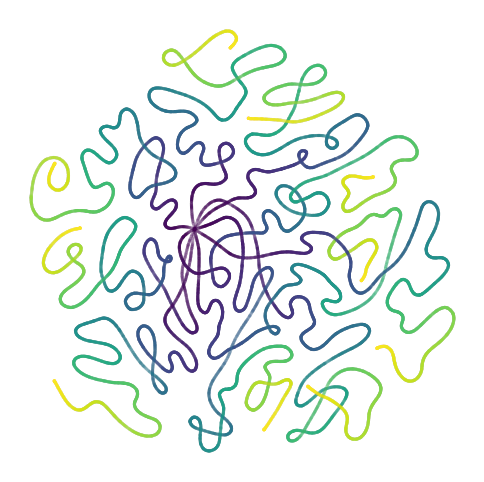

[EvalResult(eval_type='RTE', label='rte-5-euclidean', value=np.float64(0.6884742857142857), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='RPC', label='rpc-5-euclidean', value=np.float32(0.5935305), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='NNP', label='nnp-15-noself-euclidean', value=np.float64(0.8513952380952382), info={'metric': 'euclidean', 'n_neighbors': 15}),
 EvalResult(eval_type='NNP', label='nnp-50-noself-euclidean', value=np.float64(0.9225125714285715), info={'metric': 'euclidean', 'n_neighbors': 50}),
 EvalResult(eval_type='NNP', label='nnp-150-noself-euclidean', value=np.float64(0.8947360000000002), info={'metric': 'euclidean', 'n_neighbors': 150})]

In [17]:
pl.standard_eval(
    method="umap",
    params={"init": "pca", "n_neighbors": 50},
    dataset="randomwalks",
    extra_plot={"figsize": (6, 6)},
)

/home/james/dev/drnb3/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


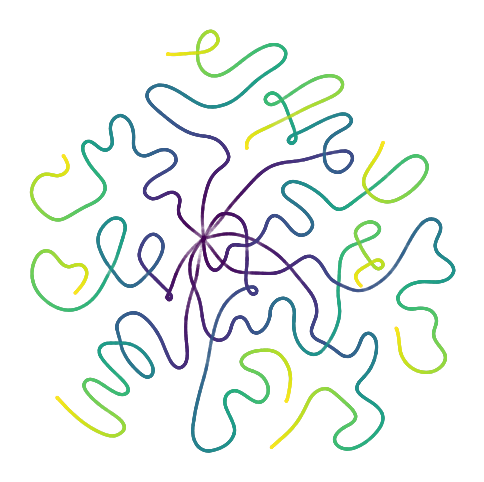

[EvalResult(eval_type='RTE', label='rte-5-euclidean', value=np.float64(0.6863342857142858), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='RPC', label='rpc-5-euclidean', value=np.float32(0.588016), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='NNP', label='nnp-15-noself-euclidean', value=np.float64(0.7711428571428572), info={'metric': 'euclidean', 'n_neighbors': 15}),
 EvalResult(eval_type='NNP', label='nnp-50-noself-euclidean', value=np.float64(0.9123828571428572), info={'metric': 'euclidean', 'n_neighbors': 50}),
 EvalResult(eval_type='NNP', label='nnp-150-noself-euclidean', value=np.float64(0.9301111428571429), info={'metric': 'euclidean', 'n_neighbors': 150})]

In [18]:
pl.standard_eval(
    method="umap",
    params={"init": "pca", "n_neighbors": 150},
    dataset="randomwalks",
    extra_plot={"figsize": (6, 6)},
)

We're getting there, but slowly. For datasets like this, I am not sure I have a good approach to
embed them with a local graph-like method like UMAP.

Let's turn things around and look at a larger number of shorter walks. The walk length is now on
a similar scale to the Steven Morse blog post.

In [23]:
short_walks_data, short_walks_labels = create_random_walks(
    n_dims=768, n_walks=700, walk_length=100
)

_ = create_default_pipeline(check_for_duplicates=True).run(
    "randomwalks-short",
    data=short_walks_data,
    target=short_walks_labels,
    tags=["synthetic"],
    url="https://stmorse.github.io/journal/rw-manifold.html",
    verbose=True,
)

[15:08:27] INFO     Requesting one extra neighbor to account for self-neighbor       ]8;id=137639;file:///home/james/dev/drnb3/src/drnb/neighbors/__init__.py\__init__.py]8;;\:]8;id=453110;file:///home/james/dev/drnb3/src/drnb/neighbors/__init__.py#690\690]8;;\

           INFO     Initial data shape: (70000, 768)                                  ]8;id=325808;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=603794;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py#83\83]8;;\

           INFO     Keeping all columns                                             ]8;id=451891;file:///home/james/dev/drnb3/src/drnb/preprocess.py\preprocess.py]8;;\:]8;id=474992;file:///home/james/dev/drnb3/src/drnb/preprocess.py#90\90]8;;\

           INFO     Data shape after filtering columns: (70000, 768)                 ]8;id=843970;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=576923;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py#164\164]8;;\

           INFO     Removing rows with NAs                                           ]8;id=568099;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=242514;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py#145\145]8;;\

           INFO     Data shape after filtering NAs: (70000, 768)                     ]8;id=581754;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=908417;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py#156\156]8;;\

[15:08:30] INFO     Checked for duplicates: found 0                                  ]8;id=282231;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=223579;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py#172\172]8;;\

           INFO     Converting to numpy with {'dtype': 'float32', 'layout': 'c'}     ]8;id=164103;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=811621;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py#187\187]8;;\

           INFO     Writing data for randomwalks-short                               ]8;id=916687;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=557389;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py#298\298]8;;\

[15:09:26] INFO     Processing target with initial shape (70000, 2)                  ]8;id=842422;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=79085;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py#243\243]8;;\

           INFO     Keeping all columns                                             ]8;id=56249;file:///home/james/dev/drnb3/src/drnb/preprocess.py\preprocess.py]8;;\:]8;id=914227;file:///home/james/dev/drnb3/src/drnb/preprocess.py#90\90]8;;\

           INFO     Writing target for randomwalks-short                             ]8;id=200994;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=817871;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py#298\298]8;;\

           INFO     Calculating nearest neighbors                                    ]8;id=981390;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=179790;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py#317\317]8;;\

           INFO     Using 'faiss' to find nearest neighbors                           ]8;id=507807;file:///home/james/dev/drnb3/src/drnb/neighbors/__init__.py\__init__.py]8;;\:]8;id=658563;file:///home/james/dev/drnb3/src/drnb/neighbors/__init__.py#90\90]8;;\

           INFO     Finding 151 neighbors using faiss with euclidean metric and      ]8;id=115588;file:///home/james/dev/drnb3/src/drnb/neighbors/__init__.py\__init__.py]8;;\:]8;id=384877;file:///home/james/dev/drnb3/src/drnb/neighbors/__init__.py#103\103]8;;\
                    params: {}                                                                      

[15:09:28] INFO     Writing numpy format to                                          ]8;id=335893;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=331681;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#433\433]8;;\
                    nn/randomwalks-short.16.euclidean.exact.faiss.idx.npy                           

[15:09:31] INFO     Writing csv format to                                            ]8;id=274474;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=883794;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#405\405]8;;\
                    nn/randomwalks-short.16.euclidean.exact.faiss.idx.csv                           

[15:09:32] INFO     Writing numpy format to                                          ]8;id=501336;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=265304;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#433\433]8;;\
                    nn/randomwalks-short.16.euclidean.exact.faiss.dist.npy                          

[15:09:34] INFO     Writing csv format to                                            ]8;id=459123;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=153422;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#405\405]8;;\
                    nn/randomwalks-short.16.euclidean.exact.faiss.dist.csv                          

[15:09:36] INFO     Writing numpy format to                                          ]8;id=638875;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=782422;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#433\433]8;;\
                    nn/randomwalks-short.51.euclidean.exact.faiss.idx.npy                           

[15:09:44] INFO     Writing csv format to                                            ]8;id=156404;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=231799;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#405\405]8;;\
                    nn/randomwalks-short.51.euclidean.exact.faiss.idx.csv                           

[15:09:48] INFO     Writing numpy format to                                          ]8;id=152530;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=423884;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#433\433]8;;\
                    nn/randomwalks-short.51.euclidean.exact.faiss.dist.npy                          

[15:09:52] INFO     Writing csv format to                                            ]8;id=455580;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=285734;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#405\405]8;;\
                    nn/randomwalks-short.51.euclidean.exact.faiss.dist.csv                          

[15:09:57] INFO     Writing numpy format to                                          ]8;id=408693;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=75331;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#433\433]8;;\
                    nn/randomwalks-short.151.euclidean.exact.faiss.idx.npy                          

[15:09:58] INFO     Writing csv format to                                            ]8;id=65494;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=486470;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#405\405]8;;\
                    nn/randomwalks-short.151.euclidean.exact.faiss.idx.csv                          

[15:10:07] INFO     Writing numpy format to                                          ]8;id=847805;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=755450;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#433\433]8;;\
                    nn/randomwalks-short.151.euclidean.exact.faiss.dist.npy                         

           INFO     Writing csv format to                                            ]8;id=249828;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=853868;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#405\405]8;;\
                    nn/randomwalks-short.151.euclidean.exact.faiss.dist.csv                         

[15:10:21] INFO     Calculating triplets                                             ]8;id=211160;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=364049;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py#331\331]8;;\

           INFO     Writing csv format to triplets/randomwalks-short.5.1337.idx.csv  ]8;id=872953;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=742394;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#405\405]8;;\

[15:10:23] INFO     Writing csv format to                                            ]8;id=186705;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=817566;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#405\405]8;;\
                    triplets/randomwalks-short.5.1337.euclidean.csv                                 

[15:10:25] INFO     Writing numpy format to                                          ]8;id=510755;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=22887;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#433\433]8;;\
                    triplets/randomwalks-short.5.1337.idx.npy                                       

           INFO     Writing numpy format to                                          ]8;id=169382;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=342520;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#433\433]8;;\
                    triplets/randomwalks-short.5.1337.euclidean.npy                                 

           INFO     Writing pipeline result for randomwalks-short                    ]8;id=441687;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=565148;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py#134\134]8;;\

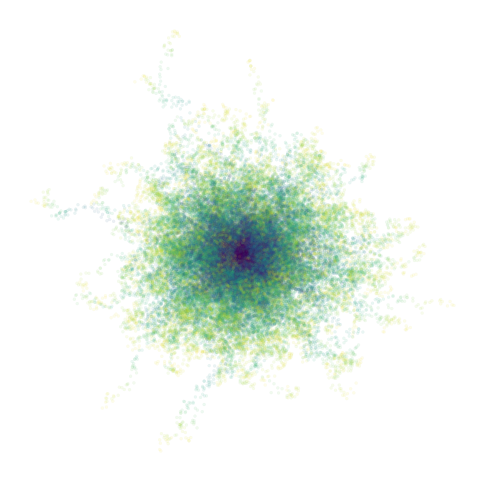

[EvalResult(eval_type='RTE', label='rte-5-euclidean', value=np.float64(0.6390885714285713), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='RPC', label='rpc-5-euclidean', value=np.float32(0.46272364), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='NNP', label='nnp-15-noself-euclidean', value=np.float64(0.05756), info={'metric': 'euclidean', 'n_neighbors': 15}),
 EvalResult(eval_type='NNP', label='nnp-50-noself-euclidean', value=np.float64(0.05991485714285716), info={'metric': 'euclidean', 'n_neighbors': 50}),
 EvalResult(eval_type='NNP', label='nnp-150-noself-euclidean', value=np.float64(0.04762257142857143), info={'metric': 'euclidean', 'n_neighbors': 150})]

In [24]:
pl.standard_eval(
    method="pca",
    dataset="randomwalks-short",
    extra_plot={"figsize": (6, 6)},
)

That's very different. Don't think I could say what was going on there.

/home/james/dev/drnb3/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


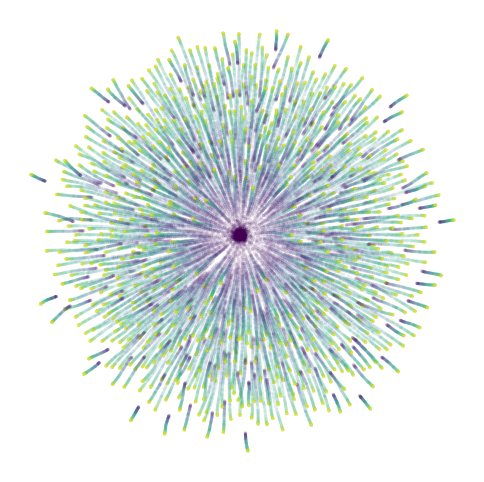

[EvalResult(eval_type='RTE', label='rte-5-euclidean', value=np.float64(0.5823714285714285), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='RPC', label='rpc-5-euclidean', value=np.float32(0.28186306), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='NNP', label='nnp-15-noself-euclidean', value=np.float64(0.5271733333333334), info={'metric': 'euclidean', 'n_neighbors': 15}),
 EvalResult(eval_type='NNP', label='nnp-50-noself-euclidean', value=np.float64(0.361498), info={'metric': 'euclidean', 'n_neighbors': 50}),
 EvalResult(eval_type='NNP', label='nnp-150-noself-euclidean', value=np.float64(0.19004961904761908), info={'metric': 'euclidean', 'n_neighbors': 150})]

In [25]:
pl.standard_eval(
    method="umap",
    params={"init": "pca"},
    dataset="randomwalks-short",
    extra_plot={"figsize": (6, 6)},
)

Feel free to discuss what this reminds you of with your therapist. UMAP is at least separating the
walks to a certain extent. Let's see what happens as we increase the nearest neighbors for this one.

/home/james/dev/drnb3/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


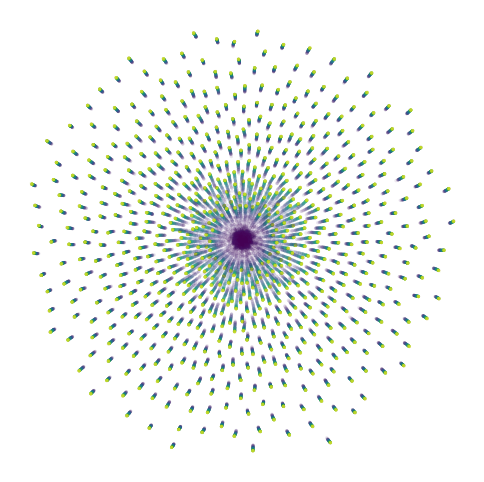

[EvalResult(eval_type='RTE', label='rte-5-euclidean', value=np.float64(0.5422971428571429), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='RPC', label='rpc-5-euclidean', value=np.float32(0.14908849), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='NNP', label='nnp-15-noself-euclidean', value=np.float64(0.7081638095238094), info={'metric': 'euclidean', 'n_neighbors': 15}),
 EvalResult(eval_type='NNP', label='nnp-50-noself-euclidean', value=np.float64(0.7305954285714285), info={'metric': 'euclidean', 'n_neighbors': 50}),
 EvalResult(eval_type='NNP', label='nnp-150-noself-euclidean', value=np.float64(0.4207554285714286), info={'metric': 'euclidean', 'n_neighbors': 150})]

In [27]:
pl.standard_eval(
    method="umap",
    params={"init": "pca", "n_neighbors": 50},
    dataset="randomwalks-short",
    extra_plot={"figsize": (6, 6)},
)

/home/james/dev/drnb3/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


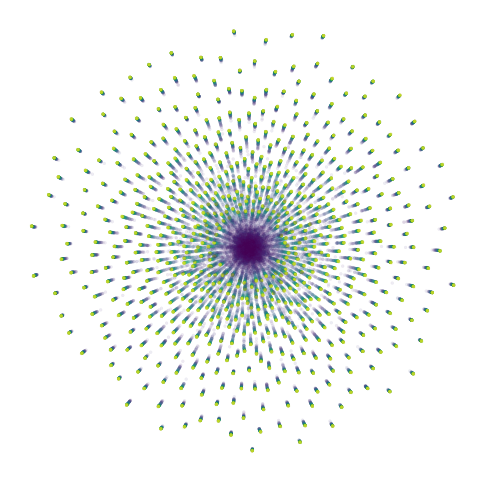

[EvalResult(eval_type='RTE', label='rte-5-euclidean', value=np.float64(0.5691857142857142), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='RPC', label='rpc-5-euclidean', value=np.float32(0.23843326), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='NNP', label='nnp-15-noself-euclidean', value=np.float64(0.5866657142857143), info={'metric': 'euclidean', 'n_neighbors': 15}),
 EvalResult(eval_type='NNP', label='nnp-50-noself-euclidean', value=np.float64(0.65951), info={'metric': 'euclidean', 'n_neighbors': 50}),
 EvalResult(eval_type='NNP', label='nnp-150-noself-euclidean', value=np.float64(0.37904847619047616), info={'metric': 'euclidean', 'n_neighbors': 150})]

In [28]:
pl.standard_eval(
    method="umap",
    params={"init": "pca", "n_neighbors": 150},
    dataset="randomwalks-short",
    extra_plot={"figsize": (6, 6)},
)

Below is the same plot, but using the Plotly backend which will let you zoom into the middle and
see what's going on there. If you do so, you'll see that the clustering gets progressively more
corrupted as we approach the center. The dark blob in the center does not have any structure to it.

In [31]:
pl.standard_eval(
    method="umap",
    params={"init": "pca", "n_neighbors": 150},
    dataset="randomwalks-short",
    extra_plot={"plot": "plotly"},
)

/home/james/dev/drnb3/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[EvalResult(eval_type='RTE', label='rte-5-euclidean', value=np.float64(0.5706885714285714), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='RPC', label='rpc-5-euclidean', value=np.float32(0.23892212), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='NNP', label='nnp-15-noself-euclidean', value=np.float64(0.5853542857142856), info={'metric': 'euclidean', 'n_neighbors': 15}),
 EvalResult(eval_type='NNP', label='nnp-50-noself-euclidean', value=np.float64(0.6582465714285716), info={'metric': 'euclidean', 'n_neighbors': 50}),
 EvalResult(eval_type='NNP', label='nnp-150-noself-euclidean', value=np.float64(0.3781446666666667), info={'metric': 'euclidean', 'n_neighbors': 150})]